In [1]:
import os
import zipfile

local_zip = '/tmp/data_gv70_gv80.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [2]:
import os

# 기본 경로
base_dir = '/tmp/data_gv70_gv80'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 이미지 경로
train_gv70_dir = os.path.join(train_dir, 'gv70')
train_gv80_dir = os.path.join(train_dir, 'gv80')
print(train_gv70_dir)
print(train_gv80_dir)

# 테스트에 사용되는 이미지 경로
validation_gv70_dir = os.path.join(validation_dir, 'gv70')
validation_gv80_dir = os.path.join(validation_dir, 'gv80')
print(validation_gv70_dir)
print(validation_gv80_dir)

#base_dir 안에 train(훈련 데이터 폴더) validation(테스트 데이터 폴더) 디렉토리를 생성 해주어야함

/tmp/data_gv70_gv80/train/gv70
/tmp/data_gv70_gv80/train/gv80
/tmp/data_gv70_gv80/validation/gv70
/tmp/data_gv70_gv80/validation/gv80


In [3]:
train_gv70_fnames = os.listdir( train_gv70_dir )
train_gv80_fnames = os.listdir( train_gv80_dir )

print(train_gv70_fnames[:5])
print(train_gv80_fnames[:5])

['gv70_41.jpg', 'gv70_55.jpg', 'gv70_51.jpg', 'gv70_46.jpg', 'gv70_57.jpg']
['gv80_32.jpg', 'gv80_54.jpeg', 'gv80_77.jpg', 'gv80_43.jpeg', 'gv80_38.jpeg']


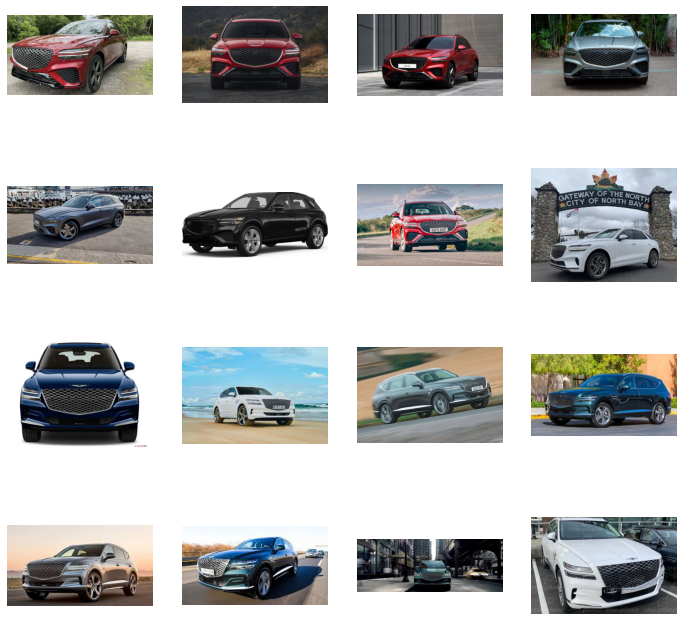

In [4]:
# 이미지 확인
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_gv70_pix = [os.path.join(train_gv70_dir, fname)
                for fname in train_gv70_fnames[ pic_index-8:pic_index]]

next_gv80_pix = [os.path.join(train_gv80_dir, fname)
                for fname in train_gv80_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_gv70_pix+next_gv80_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 93 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100


UnknownError: ignored

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    plt.imshow(img)
    plt.show()
    print(fn + " is a gv80")
  else:
    plt.imshow(img)
    plt.show()
    print(fn + " is a gv70")